# Medical Cost Personal Datasets

medical data prediction

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\my_python\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   sex         1337 non-null   object 
 2   bmi         1337 non-null   float64
 3   children    1337 non-null   int64  
 4   smoker      1337 non-null   object 
 5   region      1337 non-null   object 
 6   charges     1337 non-null   float64
 7   sex_en      1337 non-null   int32  
 8   smoker_)en  1337 non-null   int32  
 9   smoker_en   1337 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 99.2+ KB


In [23]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,sex_en,smoker_)en,smoker_en
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000,1337.000000,1337.000000,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN,NaN,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN,NaN,NaN,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487,0.504862,0.204936,0.204936
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656,0.500163,0.403806,0.403806
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000,0.000000,0.000000,0.000000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300,1.000000,0.000000,0.000000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450,1.000000,0.000000,0.000000


In [41]:
ge=LabelEncoder()
df['sex_en']=ge.fit_transform(df['sex'])
smk=LabelEncoder()
df['smoker_en']=smk.fit_transform(df['smoker'])
re=LabelEncoder()
df['region_en']=re.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_en,smoker_)en,smoker_en,region_en
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1


In [37]:
x = df[['age','sex_en','bmi','children','smoker_en','region_en']] # [ 2D]
y = df['charges'] # [1D]

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state = 42 )

In [39]:
char_model = LinearRegression()
char_model.fit(x_train,y_train)

LinearRegression()

In [44]:
a=float(input("enter your age"))
gen=input("enter your gender (female/male) :")
b=float(input("enter your BMI :"))
c=int(input("how many children you have :"))
s=input("are you smoker ? (yes/no) :")
r=input("region come from ? ( southwest,southeast,northwest,northeast) :")

enter your age 30
enter your gender (female/male) : female
enter your BMI : 27
how many children you have : 0
are you smoker ? (yes/no) : no
region come from ? ( southwest,southeast,northwest,northeast) : southwest


In [45]:
gen_enc=ge.transform([gen])[0]
smk_enc=smk.transform([s])[0]
re_enc=re.transform([r])[0]
print(gen_enc,smk_enc,re_enc)

0 0 3


In [46]:
result=char_model.predict([[a,gen_enc,b,c,smk_enc,re_enc]])
print("the predicted charge is : ",result[0])

the predicted charge is :  4142.804347620568


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
model= char_model.predict(x_test)

In [49]:
len(y_test)

268

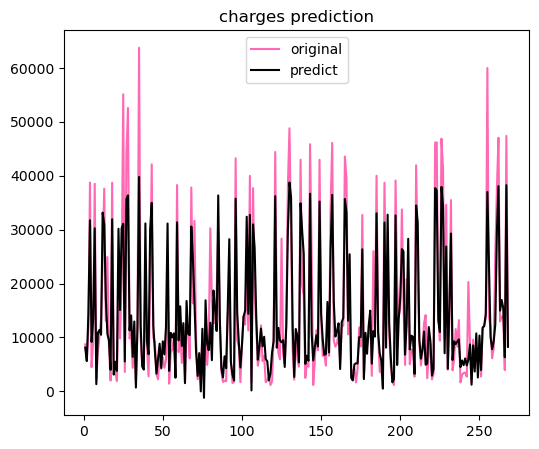

In [50]:
#plotting original values
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(np.arange(1,269),y_test,label='original',color='hotpink')
#plotting predict values in lines 
plt.plot(np.arange(1,269),model,label='predict',color='k')
plt.title("charges prediction")
plt.legend()
plt.show()

In [51]:
# R_square
r2s1 = r2_score(y_test,model)
print(r2s1)
if r2s1 > 0.5 :
    print("Model is Good fit")
else:
    print("Model is not good fit")

0.8068466322629111
Model is Good fit


In [52]:
mse1 = mean_squared_error(y_test,model)
print(mse1)

35493102.61165053


In [53]:
#MAE
mae1 = mean_absolute_error(y_test,model)
print(mae1)

4182.3531552883
